In [1]:
import pandas as pd
import numpy as np
import scipy.special
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Create Data Frame

In [3]:
df = pd.DataFrame(X, columns= feature_names )
df['Class_labels'] = y
df['Class_labels'] = df['Class_labels'].replace([0,1,2],['setosa', 'versicolor', 'virginica'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_labels
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Some basic statistical analysis about the data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Class_labels       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# to display no. of samples on each class
df['Class_labels'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Class_labels, dtype: int64

In [7]:
# check for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Class_labels         0
dtype: int64

# Visualize the Data

<AxesSubplot:>

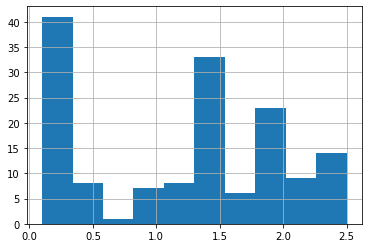

In [8]:
# histograms
df['petal width (cm)'].hist()

In [9]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['virginica','versicolor','setosa']

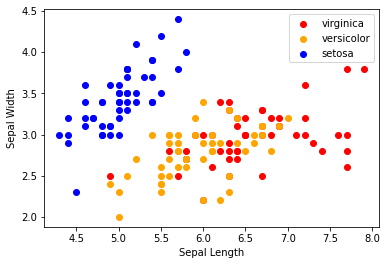

In [10]:
for i in range(3):
    x = df[df['Class_labels'] == species[i]]
    plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()


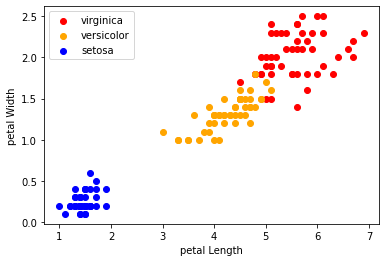

In [11]:
for i in range(3):
    x = df[df['Class_labels'] == species[i]]
    plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c = colors[i], label=species[i])
plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.legend()


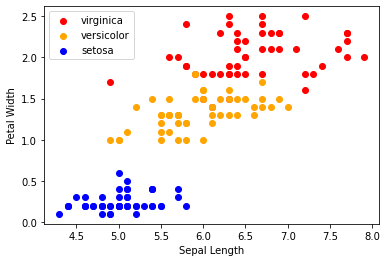

In [12]:
for i in range(3):
    x = df[df['Class_labels'] == species[i]]
    plt.scatter(x['sepal length (cm)'], x['petal width (cm)'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.legend()


In [13]:
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()


In [14]:
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=42)

n_features = X.shape[1]
n_classes = Y.shape[1]

In [15]:
    def cross_entropy(self,y,y_pre):
        y_pre = y_pre.T
        loss=-np.sum(y*np.log(y_pre))
        return loss/float(y_pre.shape[0])
    

# Create Model

In [16]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.loss = 1
        
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    def sigmoid(self, a):
        o = 1/(1+np.exp(-1*a))
        return o
    
    def softmax(self, x, derivative=False):
        # Numerically stable with large exponentials
        exps = np.exp(x - x.max())
        if derivative:
            return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
        return exps / np.sum(exps, axis=0)
    

    def cross_entropy(self, x, y):
        """ Computes cross entropy between two distributions.
        Input: x: iterabale of N non-negative values
               y: iterabale of N non-negative values
        Returns: scalar
        """
        y = y.T
        if np.any(x < 0) or np.any(y < 0):
            raise ValueError('Negative values exist.')

        # Force to proper probability mass function.
        x = np.array(x, dtype=np.float)
        y = np.array(y, dtype=np.float)
        x /= np.sum(x)
        y /= np.sum(y)

        # Ignore zero 'y' elements.
        mask = y > 0
        x = x[mask]
        y = y[mask]    
        ce = -np.sum(x * np.log(y)) 
        return ce

    def compute_accuracy(self, targets, outputs):
        predictions = []
        pred = np.argmax(outputs.T)
        predictions.append(np.argmax(outputs.T, axis=1) == np.argmax(targets, axis=1))
        accuracy = np.mean(predictions)
        return accuracy
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        #hidden_outputs = self.activation_function(hidden_inputs)
        
        hidden_outputs = self.sigmoid(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        #final_outputs = self.softmax(final_inputs)
        
        # output layer error is the (target - actual)
        accuracy = self.compute_accuracy(Y_train, final_outputs)
        
        output_errors = targets - final_outputs
        crossEntropy_der = final_outputs - targets


        loss = self.cross_entropy(final_outputs, Y_train)
        #output_errors = loss

        
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        #self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        #self.who += - self.lr * np.dot(crossEntropy_der * self.softmax(final_outputs, derivative = True), np.transpose(hidden_outputs))
        self.who += - self.lr * np.dot(crossEntropy_der , np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        
        return accuracy

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        #hidden_outputs = self.ReLU(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.softmax(final_inputs)
        
        return final_outputs

In [17]:
# number of input, hidden and output nodes
input_nodes = 4
hidden_nodes = 8
output_nodes = 3

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [18]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 100

for e in range(epochs):
    # go through all records in the training data set
       
    accuracy = n.train(X_train, Y_train)
    accuracy = accuracy.T
    print('Epoch: {}, Accuracy: {} %'.format(e+1, accuracy*100))
    
    
    pass

Epoch: 1, Accuracy: 28.333333333333332 %
Epoch: 2, Accuracy: 63.33333333333333 %
Epoch: 3, Accuracy: 65.83333333333333 %
Epoch: 4, Accuracy: 65.83333333333333 %
Epoch: 5, Accuracy: 65.0 %
Epoch: 6, Accuracy: 77.5 %
Epoch: 7, Accuracy: 69.16666666666667 %
Epoch: 8, Accuracy: 73.33333333333333 %
Epoch: 9, Accuracy: 81.66666666666667 %
Epoch: 10, Accuracy: 80.0 %
Epoch: 11, Accuracy: 85.0 %
Epoch: 12, Accuracy: 80.83333333333333 %
Epoch: 13, Accuracy: 87.5 %
Epoch: 14, Accuracy: 83.33333333333334 %
Epoch: 15, Accuracy: 89.16666666666667 %
Epoch: 16, Accuracy: 84.16666666666667 %
Epoch: 17, Accuracy: 88.33333333333333 %
Epoch: 18, Accuracy: 83.33333333333334 %
Epoch: 19, Accuracy: 87.5 %
Epoch: 20, Accuracy: 85.0 %
Epoch: 21, Accuracy: 91.66666666666666 %
Epoch: 22, Accuracy: 85.0 %
Epoch: 23, Accuracy: 90.83333333333333 %
Epoch: 24, Accuracy: 85.83333333333333 %
Epoch: 25, Accuracy: 93.33333333333333 %
Epoch: 26, Accuracy: 85.83333333333333 %
Epoch: 27, Accuracy: 91.66666666666666 %
Epoch

In [19]:
def compute_accuracy(targets, outputs):
    predictions = []
    pred = np.argmax(outputs.T)
    predictions.append(np.argmax(outputs.T, axis=1) == np.argmax(targets, axis=1))
    accuracy = np.mean(predictions)
    return accuracy

In [20]:
# query the network
outputs = n.query(X_test)
accuracy = compute_accuracy(Y_test, outputs)
print(accuracy)

1.0


In [21]:
# query the network
outputs = n.query(X_test)
predictions = []

pred = np.argmax(outputs.T)
predictions.append(np.argmax(outputs.T, axis=1) == np.argmax(Y_test, axis=1))

accuracy = np.mean(predictions)
outputs = np.where(outputs > .5 , 1.0, 0.0)  
print(accuracy)
outputs.shape


1.0


(3, 30)

In [22]:
print(outputs.T,'  ',Y_test)


[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]    [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [23]:
accuracy

1.0

In [24]:
print(Y_test ,'   ')

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]    
